# Affinity Propogation Clustering Example

# Importing Necessary Libraries
##### This section imports the required libraries for generating data, running Affinity Propagation, and visualizing the results.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from itertools import cycle, islice


# Generating Synthetic Data
##### Here, we generate a synthetic dataset with three centers using `make_blobs`. This data will be used to demonstrate the Affinity Propagation algorithm.


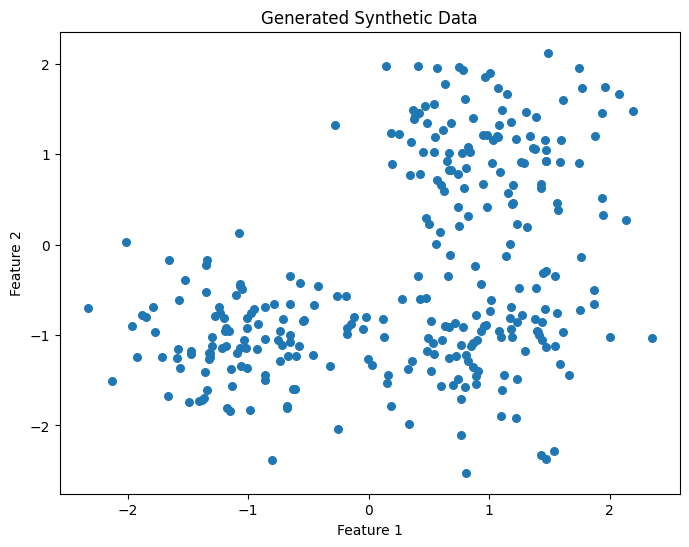

In [3]:
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5, random_state=0)

# Plot the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Running Affinity Propagation
##### In this section, we apply the Affinity Propagation algorithm to the synthetic data to identify clusters and their exemplars.


In [4]:
# Run Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 3


# Visualizing Clustering Results
##### This section visualizes the clustering results by plotting the data points with different colors for different clusters and highlighting the exemplars.


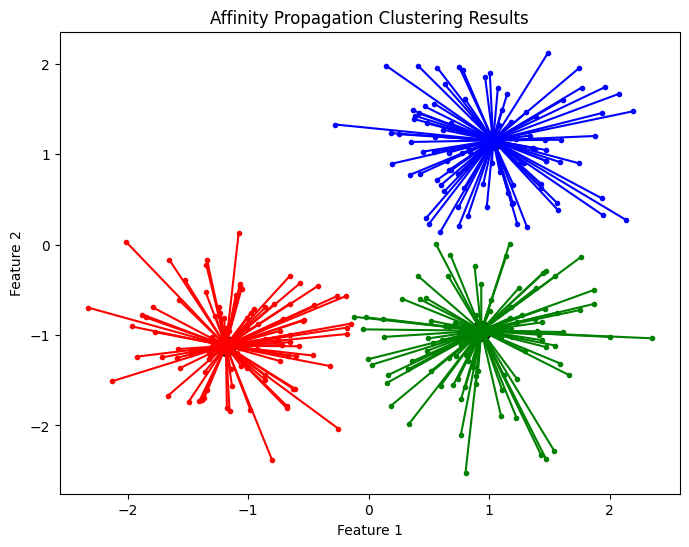

In [5]:
plt.figure(figsize=(8, 6))
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Affinity Propagation Clustering Results')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Evaluating the Clustering
##### Finally, we evaluate the clustering performance using the Silhouette Score, which measures how similar each point is to its own cluster compared to other clusters.


In [6]:
from sklearn import metrics

silhouette_score = metrics.silhouette_score(X, labels, metric='sqeuclidean')
print("Silhouette Coefficient: %0.3f" % silhouette_score)


Silhouette Coefficient: 0.753
